# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.0.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.1.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.10.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.100.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.101.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.102.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.103.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.104.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.105.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.106.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.107.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.108.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset2\test\Autistic.109.jpg
C:/Users/Admin/Downloads/Thesis Code/Autism

ModuleNotFoundError: No module named 'keras.layers.core'

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset2/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset2/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

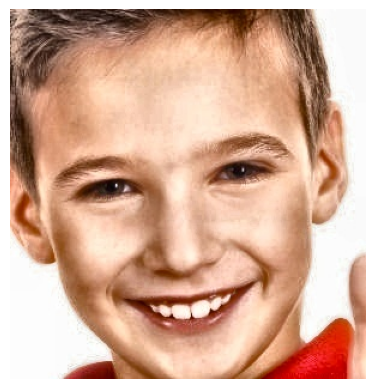

In [7]:
import matplotlib.image as mpimg
# Assuming train_imgs is a list of image file paths
for ima in train_imgs[0:1]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.axis('off')  # Turn off axis for cleaner output
#     plt.savefig('saved_image.png', bbox_inches='tight', pad_inches=0)  # Save the image as 'saved_image.png'
    plt.show()
    

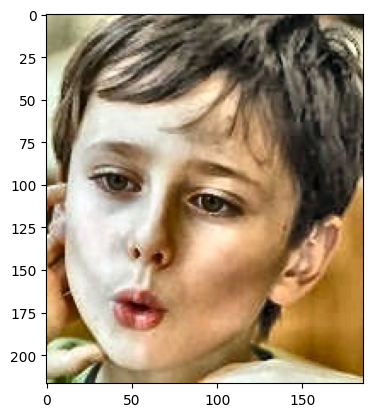

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image_path in list_of_images:
        # Read and resize the image
        img = cv2.resize(cv2.imread(image_path, cv2.IMREAD_COLOR), (224, 224), interpolation=cv2.INTER_CUBIC)
        
        if 'Non_Autistic' in image_path:
            y.append(0)
        else:
            y.append(1)
            
    return X, y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset2/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset2/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset2/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset2/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

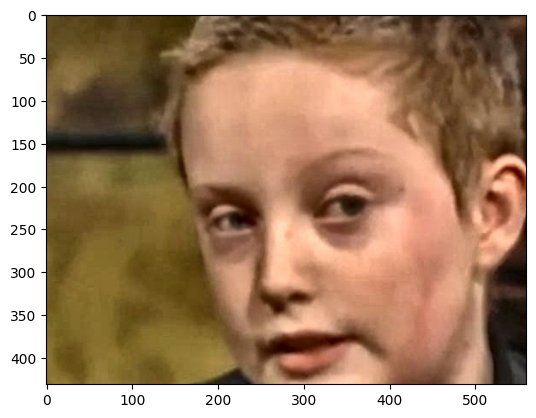

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Preprocessing 

In [13]:
def preprocess_image(train_data, target_size=(224, 224)):
    # Read the image
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    # Resize the image
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Normalize pixel values
    image = image / 255.0
#     image = image / 255.0
    
    return image

X_train = [preprocess_image(train_data) for train_data in train_imgs]
X_test = [preprocess_image(test_data) for test_data in test_imgs]
X_val = [preprocess_image(val_data) for val_data in val_imgs]


# Converting Train & Val Data To np Array


In [14]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Data Augmentation

In [15]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import cv2
# import numpy as np

# # Generating Larger DataSet - Data Augmentation
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     zoom_range=0.2,
#     brightness_range=[0.7, 1.3],  # Adjust brightness
# )

# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# # Creating ImageDataGenerator generators
# batch_size = 32
# train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
# val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)
# test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [16]:
import numpy as np
import cv2
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from tensorflow.keras.applications.mobilenet import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnetb0

# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data, input_size=(224, 224)):
    base_model = model(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = cv2.resize(img, (input_size[0], input_size[1]))  # Resize or crop to match the model's input size
        img = np.expand_dims(img, axis=0)
        if model == Xception:
            img = preprocess_input_xception(img.copy())
        elif model == VGG19:
            img = preprocess_input_vgg19(img.copy())
        elif model == MobileNet:
            img = preprocess_input_mobilenet(img.copy())
        elif model == VGG16:
            img = preprocess_input_vgg16(img.copy())
        elif model == EfficientNetB0:
            img = preprocess_input_efficientnetb0(img.copy())
        features.append(model.predict(img))

    return np.vstack(features)

# Assuming you have X_train, X_val, y_train_encoded, and y_val_encoded from your previous code

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_val_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train))
    X_val_features.append(extract_features(model, X_val))
    X_test_features.append(extract_features(model, X_test))
    

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_val_features = np.concatenate(X_val_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)


# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_val_features_std = scaler.transform(X_val_features)
X_test_features_std = scaler.transform(X_test_features)






1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 105ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 210ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 186ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 196ms/step


1/1 [==============================] - 0s 208ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 295ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 216ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 199ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 38ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 173ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 171ms/step


1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 227ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 50ms/step


In [17]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D
# from tensorflow.keras.applications import VGG16, VGG19, MobileNet, Xception, EfficientNetB0
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
# from tensorflow.keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
# from tensorflow.keras.applications.mobilenet import preprocess_input as preprocess_input_mobilenet
# from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception
# from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnetb0

# # Define your list of models
# models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# # Define a function for feature extraction using a pre-trained model
# def extract_features(model, data_generator, input_size=(224, 224)):
#     base_model = model(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))
#     model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

#     features = []
#     num_batches = len(data_generator)
#     for i in range(num_batches):
#         batch_images, _ = data_generator[i]
#         batch_features = []
#         for img in batch_images:
#             if model == Xception:
#                 img = preprocess_input_xception(img.copy())
#             elif model == VGG19:
#                 img = preprocess_input_vgg19(img.copy())
#             elif model == MobileNet:
#                 img = preprocess_input_mobilenet(img.copy())
#             elif model == VGG16:
#                 img = preprocess_input_vgg16(img.copy())
#             elif model == EfficientNetB0:
#                 img = preprocess_input_efficientnetb0(img.copy())
#             batch_features.append(img)
#         batch_features = np.array(batch_features)
#         batch_features = model.predict(batch_features)
#         features.append(batch_features)

#     return np.vstack(features)

# # Assuming you have defined train_generator, val_generator, and test_generator as ImageDataGenerator instances

# # Initialize lists to store extracted features
# X_train_features = []
# X_val_features = []
# X_test_features = []

# # Extract features using each model and augmented data generator
# for model in models:
#     X_train_features.append(extract_features(model, train_generator))
#     X_val_features.append(extract_features(model, val_generator))
#     X_test_features.append(extract_features(model, test_generator))

# # Convert lists to numpy arrays
# X_train_features = np.concatenate(X_train_features, axis=1)
# X_val_features = np.concatenate(X_val_features, axis=1)
# X_test_features = np.concatenate(X_test_features, axis=1)

# # Standardize the features
# scaler = StandardScaler()
# X_train_features_std = scaler.fit_transform(X_train_features)
# X_val_features_std = scaler.transform(X_val_features)
# X_test_features_std = scaler.transform(X_test_features)


# ANOVA Analysis

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k=4000)

X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)

X_val_selected = k_best.transform(X_val_features_std)

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)


Selected Features Indices: [   1    2    3 ... 5373 5374 5375]


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_binary_dnn_model(input_dim):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # Binary classification with one output neuron and 'sigmoid' activation
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


num_selected_features = len(selected_features_indices)
dnn_model = build_binary_dnn_model(num_selected_features)




In [37]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# def build_binary_dnn_model(input_dim):
#     model = Sequential([
#         Dense(512, activation='relu', input_dim=input_dim),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(256, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(128, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')
#     ])

#     model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# # Assuming num_selected_features is defined
# num_selected_features = len(selected_features_indices)
# dnn_model = build_binary_dnn_model(num_selected_features)

# # Define callbacks for early stopping and model checkpointing
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
# model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint('model_checkpoint.h5', 
                             monitor='val_accuracy', 
                             save_best_only=True, 
                             mode='max', 
                             verbose=1)

In [39]:


loss_fn = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()


In [40]:
# Fit the model with validation data
history = dnn_model.fit(X_train_selected, y_train, 
                         epochs=20, 
                         batch_size=32, 
                         validation_data=(X_val_selected, y_val), 
                         callbacks=[checkpoint])


# Train the model with callbacks
# history = dnn_model.fit(X_train_selected, y_train, epochs=20, batch_size=32, validation_data=(X_val_selected, y_val), callbacks=[early_stopping, model_checkpoint])


Epoch 1/20
73/80 [==========================>...] - ETA: 0s - loss: 0.9331 - accuracy: 0.6871
Epoch 1: val_accuracy improved from -inf to 0.74000, saving model to model_checkpoint.h5
80/80 [==============================] - 1s 10ms/step - loss: 0.9130 - accuracy: 0.6937 - val_loss: 0.5444 - val_accuracy: 0.7400
Epoch 2/20
21/80 [======>.......................] - ETA: 0s - loss: 0.6087 - accuracy: 0.7812

C:\Users\Admin\.conda\envs\thesis\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/80 [===========================>..] - ETA: 0s - loss: 0.6444 - accuracy: 0.7606
Epoch 2: val_accuracy improved from 0.74000 to 0.78000, saving model to model_checkpoint.h5
80/80 [==============================] - 1s 9ms/step - loss: 0.6511 - accuracy: 0.7587 - val_loss: 0.4953 - val_accuracy: 0.7800
Epoch 3/20
77/80 [===========================>..] - ETA: 0s - loss: 0.4630 - accuracy: 0.8113
Epoch 3: val_accuracy did not improve from 0.78000
80/80 [==============================] - 1s 8ms/step - loss: 0.4613 - accuracy: 0.8126 - val_loss: 0.5335 - val_accuracy: 0.7700
Epoch 4/20
77/80 [===========================>..] - ETA: 0s - loss: 0.3636 - accuracy: 0.8531
Epoch 4: val_accuracy improved from 0.78000 to 0.80000, saving model to model_checkpoint.h5
80/80 [==============================] - 1s 9ms/step - loss: 0.3641 - accuracy: 0.8516 - val_loss: 0.5165 - val_accuracy: 0.8000
Epoch 5/20
77/80 [===========================>..] - ETA: 0s - loss: 0.3715 - accuracy: 0.8563
Epoch 5: val_

In [41]:
# Evaluate the model on the test data
test_loss, test_accuracy = dnn_model.evaluate(X_test_selected, y_test)
print("Test Accuracy:", test_accuracy*100)

10/10 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.8667
Test Accuracy: 86.66666746139526


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


# Define a function to predict labels using the model
def predict_labels(X_data):
    predictions = dnn_model.predict(X_data)
    # Convert probabilities to class labels using a threshold (e.g., 0.5)
    threshold = 0.5
    y_pred = np.where(predictions > threshold, 1, 0)
    return y_pred

# Predict labels for test set
y_test_pred = predict_labels(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Calculate precision
precision = precision_score(y_test, y_test_pred)

# Calculate recall
recall = recall_score(y_test, y_test_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Test Accuracy:", accuracy * 100)  # Multiply by 100 to represent as percentage
print("Test Precision:", precision * 100)
print("Test Recall:", recall * 100)
print("Confusion Matrix:")
print(conf_matrix)


10/10 [==============================] - 0s 2ms/step
Test Accuracy: 86.66666666666667
Test Precision: 88.73239436619718
Test Recall: 84.0
Confusion Matrix:
[[134  16]
 [ 24 126]]


# Memory Release

In [25]:
import gc

In [45]:
del X_train_features, X_val_features, X_train, X_val
gc.collect()  

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")